In [1]:
import rasterio
from rasterio.mask import mask
import geopandas as gpd
import numpy as np
from shapely.geometry import mapping
import geopandas as gpd

In [2]:
import os # we need os to do some basic file operations

sentinal_fp = "../RandomForest/data_a/sentinel/"
# find every file in the sentinal_fp directory
sentinal_band_paths = [os.path.join(sentinal_fp, f) for f in os.listdir(sentinal_fp) if os.path.isfile(os.path.join(sentinal_fp, f))]
sentinal_band_paths.sort()
sentinal_band_paths

['../RandomForest/data_a/sentinel/T32UPU_20210814T102031_B02_10m_extent.tif',
 '../RandomForest/data_a/sentinel/T32UPU_20210814T102031_B03_10m_extent.tif',
 '../RandomForest/data_a/sentinel/T32UPU_20210814T102031_B04_10m_extent.tif',
 '../RandomForest/data_a/sentinel/T32UPU_20210814T102031_B05_20m_extent.tif',
 '../RandomForest/data_a/sentinel/T32UPU_20210814T102031_B06_20m_extent.tif',
 '../RandomForest/data_a/sentinel/T32UPU_20210814T102031_B07_20m_extent.tif',
 '../RandomForest/data_a/sentinel/T32UPU_20210814T102031_B08_10m_extent.tif',
 '../RandomForest/data_a/sentinel/T32UPU_20210814T102031_B8A_20m_extent.tif']

In [3]:
file_path = 'C:/Users/leoni/Documents/Uni/UGS/RandomForest/data_a/landcover/Data/DE033L1_AUGSBURG_UA2018_v013.gpkg'

# Load the dataset
data = gpd.read_file(file_path)
data

country  fua_name fua_code code_2018  \
0          DE  Augsburg  DE033L1     11100   
1          DE  Augsburg  DE033L1     11100   
2          DE  Augsburg  DE033L1     11100   
3          DE  Augsburg  DE033L1     11210   
4          DE  Augsburg  DE033L1     11100   
...       ...       ...      ...       ...   
25378      DE  Augsburg  DE033L1     31000   
25379      DE  Augsburg  DE033L1     32000   
25380      DE  Augsburg  DE033L1     32000   
25381      DE  Augsburg  DE033L1     50000   
25382      DE  Augsburg  DE033L1     23000   

                                              class_2018 prod_date  \
0                 Continuous urban fabric (S.L. : > 80%)   2020-09   
1                 Continuous urban fabric (S.L. : > 80%)   2020-09   
2                 Continuous urban fabric (S.L. : > 80%)   2020-09   
3      Discontinuous dense urban fabric (S.L. : 50% -...   2020-09   
4                 Continuous urban fabric (S.L. : > 80%)   2020-09   
...                                                  ...       ...   
25378                                            Forests   2020-09   
25379  Herbaceous vegetation associations (natural gr...   2020-09   
25380  Herbaceous vegetation associations (natural gr...   2020-09   
25381                                              Water   2020-09   
25382                                           Pastures   2020-09   

          identifier    perimeter          area comment  Pop2018  \
0        425-DE033L1   155.888916   1185.135544    None        9   
1        785-DE033L1   204.742805   2617.844445    None       53   
2        751-DE033L1   397.305451   9451.982988    None      193   
3       5156-DE033L1  2683.734912  35662.775997    None      166   
4       1986-DE033L1   297.148595   4588.045376    None       60   
...              ...          ...           ...     ...      ...   
25378  24837-DE033L1   682.883091  27090.306391    None        0   
25379  25099-DE033L1   485.354917  11090.189969    None        0   
25380  25134-DE033L1   528.446541  11505.819504    None        0   
25381  25235-DE033L1   568.167123  10591.167983    None        0   
25382  23246-DE033L1   763.153970  18744.576748    None        0   

                                                geometry  
0      MULTIPOLYGON (((4387596.158 2801154.636, 43875...  
1      MULTIPOLYGON (((4385599.462 2805744.357, 43856...  
2      MULTIPOLYGON (((4389167.596 2805621.979, 43890...  
3      MULTIPOLYGON (((4394320.820 2808000.000, 43943...  
4      MULTIPOLYGON (((4389395.144 2807242.564, 43893...  
...                                                  ...  
25378  MULTIPOLYGON (((4411181.690 2815311.223, 44111...  
25379  MULTIPOLYGON (((4397210.659 2824962.333, 43972...  
25380  MULTIPOLYGON (((4397105.659 2832772.333, 43971...  
25381  MULTIPOLYGON (((4388260.684 2807000.000, 43882...  
25382  MULTIPOLYGON (((4391115.659 2828972.333, 43911...  

[25383 rows x 12 columns]

In [4]:
# create a products directory within the data dir which won't be uploaded to Github
img_dir = '../RandomForest/data_a/products2/'

# check to see if the dir it exists, if not, create it
if not os.path.exists(img_dir):
    os.makedirs(img_dir)

# filepath for image we're writing out
img_fp = img_dir + 'sentinel_bands.tif'

# Read metadata of first file and assume all other bands are the same
with rasterio.open(sentinal_band_paths[0]) as src0:
    meta = src0.meta

# Update metadata to reflect the number of layers
meta.update(count = len(sentinal_band_paths))

# # Read each layer and write it to stack
# with rasterio.open(img_fp, 'w', **meta) as dst:
#     for id, layer in enumerate(sentinal_band_paths, start=1):
#         with rasterio.open(layer) as src1:
#             dst.write_band(id, src1.read(1))

In [5]:
full_dataset = rasterio.open(img_fp)
img_rows, img_cols = full_dataset.shape
img_bands = full_dataset.count
print(full_dataset.shape) # dimensions
print(full_dataset.count) # bands

(2197, 1478)
8


In [6]:
full_dataset

<open DatasetReader name='../RandomForest/data_a/products2/sentinel_bands.tif' mode='r'>

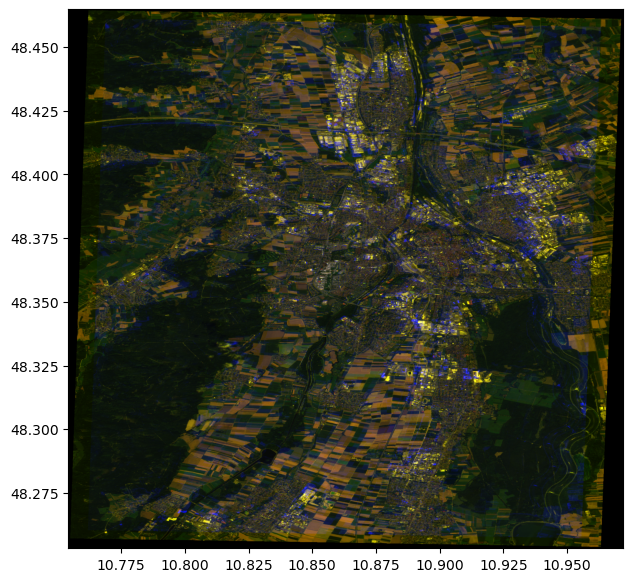

In [7]:
import numpy as np
from rasterio.plot import show
import matplotlib.pyplot as plt

img_fp = '../RandomForest/data_a/products2/sentinel_bands_proj.tif'

# Open the full extent of the raster dataset
with rasterio.open(img_fp) as dataset:
    # Read the specified bands (3, 2, 1 for RGB)
    img_data = dataset.read([3, 2, 1])
# Assuming you've already read the img_data
# Scale the data to 0-255 range, assuming it's 16-bit
img_data = np.clip(img_data / 4096 * 255, 0, 255).astype(np.uint8)

# Mask out no data values if necessary
no_data_value = -9999  # Replace with your actual no data value
img_data[img_data == no_data_value] = 0  # Set no data values to 0 for display

# Now display the image
fig, ax = plt.subplots(figsize=(10, 7))
show(img_data, ax=ax, transform=dataset.transform)

plt.show()

In [8]:
full_dataset = rasterio.open(img_fp)
raster_crs = full_dataset.crs

In [9]:
from rasterio.warp import calculate_default_transform, reproject, Resampling

# Define the source and destination coordinate reference systems
src_crs = 'EPSG:32632'
dst_crs = 'EPSG:4326'

# Open the original dataset
with rasterio.open('../RandomForest/data_a/products/sentinel_bands.tif') as src:
    # Calculate the transform and dimensions for the new dataset
    transform, width, height = calculate_default_transform(
        src.crs, dst_crs, src.width, src.height, *src.bounds)
    
    # Define the metadata for the new dataset
    kwargs = src.meta.copy()
    kwargs.update({
        'crs': dst_crs,
        'transform': transform,
        'width': width,
        'height': height
    })

    # Create the new dataset and reproject the original data into it
    with rasterio.open('../RandomForest/data_a/products/sentinel_bands_proj.tif', 'w', **kwargs) as dst:
        for i in range(1, src.count + 1):  # Loop through all bands
            reproject(
                source=rasterio.band(src, i),
                destination=rasterio.band(dst, i),
                src_transform=src.transform,
                src_crs=src.crs,
                dst_transform=transform,
                dst_crs=dst_crs,
                resampling=Resampling.nearest)

In [10]:
shapefile = gpd.read_file('C:/Users/leoni/Documents/Uni/UGS/RandomForest/data_a/landcover/Data/DE033L1_AUGSBURG_UA2018_v013.gpkg')
shapefile.crs

<Projected CRS: EPSG:3035>
Name: ETRS89-extended / LAEA Europe
Axis Info [cartesian]:
- Y[north]: Northing (metre)
- X[east]: Easting (metre)
Area of Use:
- name: Europe - European Union (EU) countries and candidates. Europe - onshore and offshore: Albania; Andorra; Austria; Belgium; Bosnia and Herzegovina; Bulgaria; Croatia; Cyprus; Czechia; Denmark; Estonia; Faroe Islands; Finland; France; Germany; Gibraltar; Greece; Hungary; Iceland; Ireland; Italy; Kosovo; Latvia; Liechtenstein; Lithuania; Luxembourg; Malta; Monaco; Montenegro; Netherlands; North Macedonia; Norway including Svalbard and Jan Mayen; Poland; Portugal including Madeira and Azores; Romania; San Marino; Serbia; Slovakia; Slovenia; Spain including Canary Islands; Sweden; Switzerland; Türkiye (Turkey); United Kingdom (UK) including Channel Islands and Isle of Man; Vatican City State.
- bounds: (-35.58, 24.6, 44.83, 84.73)
Coordinate Operation:
- name: Europe Equal Area 2001
- method: Lambert Azimuthal Equal Area
Datum: Eur

In [11]:
shapefile = shapefile.to_crs(epsg=32632)
shapefile.crs

<Projected CRS: EPSG:32632>
Name: WGS 84 / UTM zone 32N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 6°E and 12°E, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Austria. Cameroon. Denmark. Equatorial Guinea. France. Gabon. Germany. Italy. Libya. Liechtenstein. Monaco. Netherlands. Niger. Nigeria. Norway. Sao Tome and Principe. Svalbard. Sweden. Switzerland. Tunisia. Vatican City State.
- bounds: (6.0, 0.0, 12.0, 84.0)
Coordinate Operation:
- name: UTM zone 32N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [12]:
print(shapefile)
shapefile["class_2018"].unique()

      country  fua_name fua_code code_2018  \
0          DE  Augsburg  DE033L1     11100   
1          DE  Augsburg  DE033L1     11100   
2          DE  Augsburg  DE033L1     11100   
3          DE  Augsburg  DE033L1     11210   
4          DE  Augsburg  DE033L1     11100   
...       ...       ...      ...       ...   
25378      DE  Augsburg  DE033L1     31000   
25379      DE  Augsburg  DE033L1     32000   
25380      DE  Augsburg  DE033L1     32000   
25381      DE  Augsburg  DE033L1     50000   
25382      DE  Augsburg  DE033L1     23000   

                                              class_2018 prod_date  \
0                 Continuous urban fabric (S.L. : > 80%)   2020-09   
1                 Continuous urban fabric (S.L. : > 80%)   2020-09   
2                 Continuous urban fabric (S.L. : > 80%)   2020-09   
3      Discontinuous dense urban fabric (S.L. : 50% -...   2020-09   
4                 Continuous urban fabric (S.L. : > 80%)   2020-09   
...                        

array(['Continuous urban fabric (S.L. : > 80%)',
       'Discontinuous dense urban fabric (S.L. : 50% -  80%)', 'Pastures',
       'Arable land (annual crops)',
       'Discontinuous medium density urban fabric (S.L. : 30% - 50%)',
       'Industrial, commercial, public, military and private units',
       'Other roads and associated land',
       'Discontinuous low density urban fabric (S.L. : 10% - 30%)',
       'Isolated structures', 'Railways and associated land',
       'Mineral extraction and dump sites', 'Land without current use',
       'Green urban areas', 'Sports and leisure facilities', 'Forests',
       'Water',
       'Discontinuous very low density urban fabric (S.L. : < 10%)',
       'Herbaceous vegetation associations (natural grassland, moors...)',
       'Fast transit roads and associated land', 'Construction sites',
       'Airports'], dtype=object)

In [13]:
shapefile.groupby('code_2018')['class_2018'].unique()

code_2018
11100             [Continuous urban fabric (S.L. : > 80%)]
11210    [Discontinuous dense urban fabric (S.L. : 50% ...
11220    [Discontinuous medium density urban fabric (S....
11230    [Discontinuous low density urban fabric (S.L. ...
11240    [Discontinuous very low density urban fabric (...
11300                                [Isolated structures]
12100    [Industrial, commercial, public, military and ...
12210             [Fast transit roads and associated land]
12220                    [Other roads and associated land]
12230                       [Railways and associated land]
12400                                           [Airports]
13100                  [Mineral extraction and dump sites]
13300                                 [Construction sites]
13400                           [Land without current use]
14100                                  [Green urban areas]
14200                      [Sports and leisure facilities]
21000                         [Arable land (an

In [14]:
shapefile = shapefile.to_crs({'init': 'epsg:4326'})
shapefile.crs

c:\Users\leoni\Programme\Miniconda\envs\geo\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Geographic 2D CRS: +init=epsg:4326 +type=crs>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [15]:
len(shapefile)

25383

In [16]:
# this generates a list of shapely geometries
geoms = shapefile.geometry.values 

# let's grab a single shapely geometry to check
geometry = geoms[0] 
print(type(geometry))
print(geometry)

# transform to GeoJSON format
from shapely.geometry import mapping
feature = [mapping(geometry)] # can also do this using polygon.__geo_interface__
print(type(feature))
print(feature)

<class 'shapely.geometry.multipolygon.MultiPolygon'>
MULTIPOLYGON (((10.897603435546376 48.32024993125257, 10.897558639391013 48.32006889000404, 10.896796603606004 48.32015034274349, 10.896843224431512 48.32033682294202, 10.897603435546376 48.32024993125257)))
<class 'list'>
[{'type': 'MultiPolygon', 'coordinates': [(((10.897603435546376, 48.32024993125257), (10.897558639391013, 48.32006889000404), (10.896796603606004, 48.32015034274349), (10.896843224431512, 48.32033682294202), (10.897603435546376, 48.32024993125257)),)]}]


In [17]:
out_image, out_transform = mask(full_dataset, feature, crop=True)
out_image.shape

(8, 3, 8)

In [18]:
full_dataset.close()

In [19]:
import geopandas as gpd
import rasterio
from rasterio.mask import mask
from shapely.geometry import mapping
from shapely.geometry import box


# Load the shapefile
#shapefile = gpd.read_file(shapefile_path)

# Check if the CRS matches, if not, reproject
if shapefile.crs != raster_crs:
    shapefile = shapefile.to_crs(raster_crs)

# Check that geometries are valid
shapefile['valid'] = shapefile.is_valid
shapefile = shapefile[shapefile['valid']]


with rasterio.open('../RandomForest/data_a/products/sentinel_bands_proj.tif') as src:
    raster_bounds = src.bounds
    raster_bbox = box(*raster_bounds)  # Create a bounding box from the raster bounds

    # Only proceed if the raster and shapefile overlap
    if not shapefile.unary_union.intersects(raster_bbox):
        raise ValueError("Shapefile and raster do not overlap")
    else:
        print("The shapefile and raster overlap.")

    # Extract the raster values within the polygon
    for geom in shapefile.geometry:
        feature = [mapping(geom)]
        out_image, out_transform = mask(src, feature, crop=True)
        # process out_image

The shapefile and raster overlap.


ValueError: Input shapes do not overlap raster.

### Adjust Landcover Data to match the scene

In [20]:
# Reproject the shapefile to match the raster's CRS
shapefile = shapefile.to_crs(epsg=32632)

In [21]:
with rasterio.open('../RandomForest/data_a/products/sentinel_bands_proj.tif') as src:
    print(src.bounds)
print(shapefile.total_bounds)

BoundingBox(left=10.7543531803083, bottom=48.25329694782757, right=10.97190533912122, top=48.46476914285253)
[ 610820.72860213 5327718.5402929   670858.48189483 5388978.22555986]


In [22]:
shapefile = shapefile.to_crs("EPSG:4326")
print(shapefile.total_bounds)

[10.494824  48.0892135 11.3108095 48.6385815]


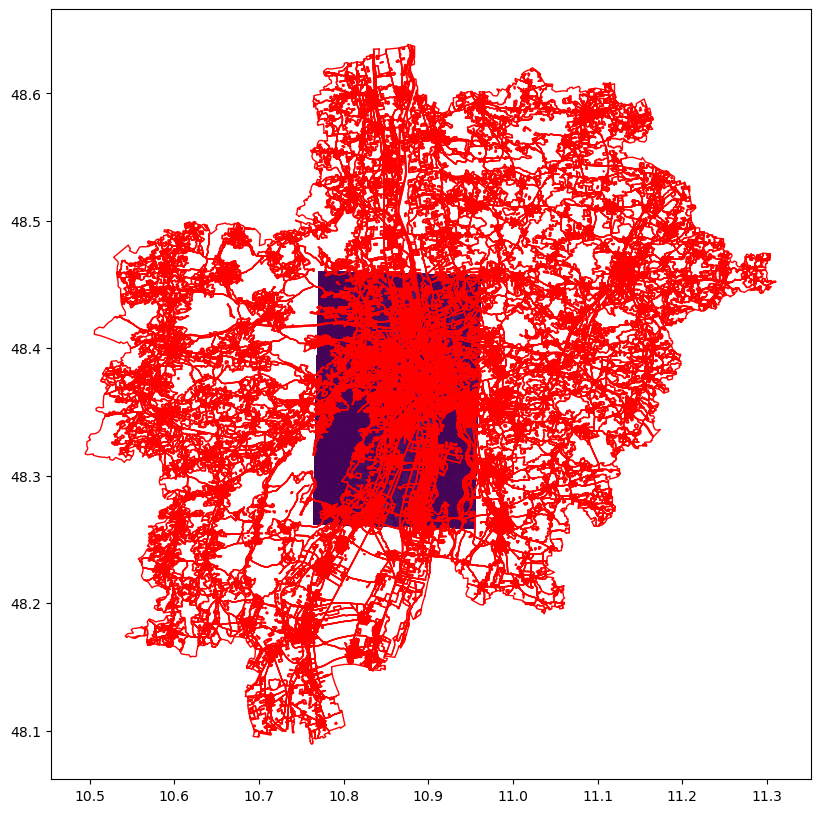

In [23]:
import matplotlib.pyplot as plt
import rasterio
import rasterio.plot

fig, ax = plt.subplots(figsize=(10, 10))
with rasterio.open('../RandomForest/data_a/products/sentinel_bands_proj.tif') as src:
    rasterio.plot.show(src, ax=ax)
shapefile.plot(ax=ax, facecolor='none', edgecolor='red')
plt.show()

In [24]:
from shapely.geometry import box
from shapely.affinity import scale

shapefile_path = 'C:/Users/leoni/Documents/Uni/UGS/RandomForest/data_a/landcover/Data/DE033L1_AUGSBURG_UA2018_v013.gpkg'

# Open the raster file and get its bounds
with rasterio.open('../RandomForest/data_a/products/sentinel_bands_proj.tif') as src:
    bounds = src.bounds

# Create a slightly smaller bounding box geometry from the raster bounds
# Reduce each side of the bounding box by a small fraction, e.g., 0.99 to reduce by 1%
smaller_bbox = scale(box(bounds.left, bounds.bottom, bounds.right, bounds.top), xfact=0.99, yfact=0.99, origin='center')

# Create a GeoDataFrame from the smaller bounding box
smaller_bbox_gdf = gpd.GeoDataFrame({'geometry': [smaller_bbox]}, crs=src.crs)

# Load the shapefile
shapefile = gpd.read_file(shapefile_path)

# Make sure the shapefile is in the same CRS as the raster
shapefile = shapefile.to_crs(src.crs)

# Perform a spatial join to find features completely within the smaller bounding box
within_shapefile = gpd.sjoin(shapefile, smaller_bbox_gdf, op='within')

# Save the clipped shapefile to a new file
within_shapefile.to_file('within_shapefile_smaller_bbox.gpkg', driver='GPKG')

c:\Users\leoni\Programme\Miniconda\envs\geo\Lib\site-packages\IPython\core\interactiveshell.py:3466: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [25]:
within_shapefile = within_shapefile.groupby('class_2018', group_keys=False).apply(lambda x: x.sample(n=30, replace=True))
within_shapefile

country  fua_name fua_code code_2018 class_2018 prod_date  \
15079      DE  Augsburg  DE033L1     12400   Airports   2020-09   
15079      DE  Augsburg  DE033L1     12400   Airports   2020-09   
15079      DE  Augsburg  DE033L1     12400   Airports   2020-09   
15079      DE  Augsburg  DE033L1     12400   Airports   2020-09   
15079      DE  Augsburg  DE033L1     12400   Airports   2020-09   
...       ...       ...      ...       ...        ...       ...   
22917      DE  Augsburg  DE033L1     50000      Water   2020-09   
24640      DE  Augsburg  DE033L1     50000      Water   2020-09   
22569      DE  Augsburg  DE033L1     50000      Water   2020-09   
24607      DE  Augsburg  DE033L1     50000      Water   2020-09   
23563      DE  Augsburg  DE033L1     50000      Water   2020-09   

          identifier    perimeter          area comment  Pop2018  \
15079  15062-DE033L1  5540.286317  1.073691e+06    None        0   
15079  15062-DE033L1  5540.286317  1.073691e+06    None        0   
15079  15062-DE033L1  5540.286317  1.073691e+06    None        0   
15079  15062-DE033L1  5540.286317  1.073691e+06    None        0   
15079  15062-DE033L1  5540.286317  1.073691e+06    None        0   
...              ...          ...           ...     ...      ...   
22917  25255-DE033L1  1521.883149  1.113501e+04    None        0   
24640  25220-DE033L1  2937.869795  5.211908e+04    None        0   
22569  25229-DE033L1   467.600086  3.681042e+03    None        0   
24607  25179-DE033L1   872.648816  3.660091e+04    None        0   
23563  25300-DE033L1   907.514933  2.919043e+04    None        0   

                                                geometry  index_right  
15079  MULTIPOLYGON (((10.92006 48.41900, 10.92004 48...            0  
15079  MULTIPOLYGON (((10.92006 48.41900, 10.92004 48...            0  
15079  MULTIPOLYGON (((10.92006 48.41900, 10.92004 48...            0  
15079  MULTIPOLYGON (((10.92006 48.41900, 10.92004 48...            0  
15079  MULTIPOLYGON (((10.92006 48.41900, 10.92004 48...            0  
...                                                  ...          ...  
22917  MULTIPOLYGON (((10.87805 48.35996, 10.87788 48...            0  
24640  MULTIPOLYGON (((10.85519 48.33916, 10.85527 48...            0  
22569  MULTIPOLYGON (((10.92455 48.36257, 10.92433 48...            0  
24607  MULTIPOLYGON (((10.75955 48.28184, 10.75928 48...            0  
23563  MULTIPOLYGON (((10.91907 48.43009, 10.91896 48...            0  

[630 rows x 13 columns]

### Only Greens

In [26]:
# Dropping rows with "Airports" and "Railways and associated land"
within_shapefile = within_shapefile[~within_shapefile['class_2018'].isin(['Airports', 'Railways and associated land'])]

# Classes for green areas and buildings
green_classes = [
    'Land without current use',
    'Green urban areas',
    'Sports and leisure facilities',
    'Arable land (annual crops)',
    'Pastures',
    'Forests',
    'Herbaceous vegetation associations (natural grassland, moors...)',
    'Water'
]

building_classes = [
    'Continuous urban fabric (S.L. : > 80%)',
    'Discontinuous dense urban fabric (S.L. : 50% - 80%)',
    'Discontinuous medium density urban fabric (S.L. : 30% - 50%)',
    'Discontinuous low density urban fabric (S.L. : 10% - 30%)',
    'Discontinuous very low density urban fabric (S.L. : < 10%)',
    'Isolated structures',
    'Industrial, commercial, public, military and private units'
]

# Adding/modifying the 'green' column to also include buildings
within_shapefile['green'] = within_shapefile['class_2018'].apply(
    lambda x: 1 if x in green_classes else (2 if x in building_classes else 0))
within_shapefile

c:\Users\leoni\Programme\Miniconda\envs\geo\Lib\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


country  fua_name fua_code code_2018                  class_2018  \
18292      DE  Augsburg  DE033L1     21000  Arable land (annual crops)   
17059      DE  Augsburg  DE033L1     21000  Arable land (annual crops)   
17030      DE  Augsburg  DE033L1     21000  Arable land (annual crops)   
19830      DE  Augsburg  DE033L1     21000  Arable land (annual crops)   
17669      DE  Augsburg  DE033L1     21000  Arable land (annual crops)   
...       ...       ...      ...       ...                         ...   
22917      DE  Augsburg  DE033L1     50000                       Water   
24640      DE  Augsburg  DE033L1     50000                       Water   
22569      DE  Augsburg  DE033L1     50000                       Water   
24607      DE  Augsburg  DE033L1     50000                       Water   
23563      DE  Augsburg  DE033L1     50000                       Water   

      prod_date     identifier    perimeter           area comment  Pop2018  \
18292   2020-09  18420-DE033L1  1746.523241   27275.228725    None       20   
17059   2020-09  17161-DE033L1  6467.963469  568244.159936    None       30   
17030   2020-09  17140-DE033L1  1983.325779   41851.591305    None        2   
19830   2020-09  20115-DE033L1  1650.772367   90397.454445    None        2   
17669   2020-09  17789-DE033L1   427.775824    7843.463774    None        0   
...         ...            ...          ...            ...     ...      ...   
22917   2020-09  25255-DE033L1  1521.883149   11135.011436    None        0   
24640   2020-09  25220-DE033L1  2937.869795   52119.077711    None        0   
22569   2020-09  25229-DE033L1   467.600086    3681.041940    None        0   
24607   2020-09  25179-DE033L1   872.648816   36600.914921    None        0   
23563   2020-09  25300-DE033L1   907.514933   29190.432565    None        0   

                                                geometry  index_right  green  
18292  MULTIPOLYGON (((10.80443 48.37144, 10.80436 48...            0      1  
17059  MULTIPOLYGON (((10.90155 48.27613, 10.90157 48...            0      1  
17030  MULTIPOLYGON (((10.83411 48.27947, 10.83403 48...            0      1  
19830  MULTIPOLYGON (((10.82109 48.41720, 10.82112 48...            0      1  
17669  MULTIPOLYGON (((10.84722 48.32884, 10.84724 48...            0      1  
...                                                  ...          ...    ...  
22917  MULTIPOLYGON (((10.87805 48.35996, 10.87788 48...            0      1  
24640  MULTIPOLYGON (((10.85519 48.33916, 10.85527 48...            0      1  
22569  MULTIPOLYGON (((10.92455 48.36257, 10.92433 48...            0      1  
24607  MULTIPOLYGON (((10.75955 48.28184, 10.75928 48...            0      1  
23563  MULTIPOLYGON (((10.91907 48.43009, 10.91896 48...            0      1  

[570 rows x 14 columns]

In [27]:
# within_shapefile.explore()
within_shapefile["green"].value_counts()

green
1    240
2    180
0    150
Name: count, dtype: int64

In [28]:
import geopandas as gpd
import rasterio
from rasterio.mask import mask
from shapely.geometry import mapping
from shapely.geometry import box


# Load the shapefile
#shapefile = gpd.read_file(shapefile_path)
shapefile = within_shapefile

# Check if the CRS matches, if not, reproject
if shapefile.crs != raster_crs:
    shapefile = shapefile.to_crs(raster_crs)

# Check that geometries are valid
shapefile['valid'] = shapefile.is_valid
shapefile = shapefile[shapefile['valid']]


with rasterio.open('../RandomForest/data_a/products/sentinel_bands_proj.tif') as src:
    raster_bounds = src.bounds
    raster_bbox = box(*raster_bounds)  # Create a bounding box from the raster bounds

    # Only proceed if the raster and shapefile overlap
    if not shapefile.unary_union.intersects(raster_bbox):
        raise ValueError("Shapefile and raster do not overlap")
    else:
        print("The shapefile and raster overlap.")

    # Extract the raster values within the polygon
    for geom in shapefile.geometry:
        feature = [mapping(geom)]
        out_image, out_transform = mask(src, feature, crop=True)
        # process out_image

c:\Users\leoni\Programme\Miniconda\envs\geo\Lib\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


The shapefile and raster overlap.


In [29]:
import numpy as np

# Initialize a list to hold the mean values for each band
band_means = []

# Extract the raster values within the polygon
for geom in shapefile.geometry:
    feature = [mapping(geom)]
    
    with rasterio.open('../RandomForest/data_a/products/sentinel_bands_proj.tif') as src:
        out_image, out_transform = mask(src, feature, crop=True)
        
        # Calculate mean of each band, excluding no-data values
        means = np.ma.array(out_image, mask=out_image == src.nodata).mean(axis=(1, 2))
        band_means.append(means.filled(src.nodata))

In [30]:
with rasterio.open('../RandomForest/data_a/products/sentinel_bands_proj.tif') as src:
    raster_crs = src.crs
shapefile_crs = shapefile.crs

print("Raster CRS: ", raster_crs)
print("Shapefile CRS: ", shapefile_crs)

Raster CRS:  EPSG:4326
Shapefile CRS:  GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]


In [31]:
with rasterio.open('../RandomForest/data_a/products/sentinel_bands_proj.tif') as src:
    raster_bounds = src.bounds

# Use the total_bounds attribute of the shapefile to get its bounding coordinates
shapefile_bounds = shapefile.total_bounds

print("Raster bounds: ", raster_bounds)
print("Shapefile bounds: ", shapefile_bounds)

Raster bounds:  BoundingBox(left=10.7543531803083, bottom=48.25329694782757, right=10.97190533912122, top=48.46476914285253)
Shapefile bounds:  [10.75626866 48.25517735 10.97020428 48.46331184]


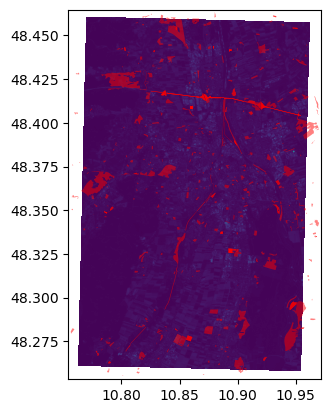

In [32]:
import matplotlib.pyplot as plt
import rasterio
import rasterio.plot

# Open the raster file
with rasterio.open('../RandomForest/data_a/products/sentinel_bands_proj.tif') as src:
    # Plot the raster
    fig, ax = plt.subplots()
    rasterio.plot.show(src, ax=ax)
    # Overlay the shapefile
    shapefile.plot(ax=ax, color='red', alpha=0.5)
    plt.show()

In [33]:
import numpy as np
import rasterio
from rasterio.mask import mask
from shapely.geometry import mapping
import geopandas as gpd
from rasterio.features import geometry_mask

img_fp = '../RandomForest/data_a/products/sentinel_bands_proj.tif'

X = np.array([], dtype=np.float32).reshape(0, 8)  # Replace '8' with the actual number of bands if different
y = []  # Initialize y as an empty list

incomplete_features = []

with rasterio.open(img_fp) as src:
    raster_crs = src.crs
    nodata = src.nodatavals[0]  # Assuming all bands have the same nodata value
    band_count = src.count

    # Iterate over the geometries in the shapefile
    for index, row in shapefile.iterrows():
        geom = row['geometry']
        # Create a mask for the current geometry
        geom_mask = geometry_mask([geom], transform=src.transform, invert=True, out_shape=(src.height, src.width))

        # Check if the geometry intersects with the raster
        if not geom_mask.all():
            out_image, out_transform = mask(src, [geom], crop=True, nodata=nodata)
            out_image_masked = np.ma.masked_equal(out_image, nodata)
            valid_data = out_image_masked.compressed()

            # Ensure we have a complete set of pixels for all bands
            if valid_data.size % band_count == 0:
                out_image_reshaped = valid_data.reshape(-1, band_count)

                # Remove rows that contain nodata values
                valid_rows = np.all(out_image_reshaped != nodata, axis=1)
                out_image_reshaped = out_image_reshaped[valid_rows]

                # Only proceed if we have valid data left after removing nodata rows
                if out_image_reshaped.size > 0:
                    X = np.vstack((X, out_image_reshaped))
                    y.extend([row['green']] * out_image_reshaped.shape[0])
            else:
                # Collect indices of incomplete features to handle later
                incomplete_features.append(index)
                print(f"Feature {index} does not have a complete set of pixels.")

# Handle incomplete features as needed
# For example, you might want to drop them from the shapefile
shapefile = shapefile.drop(incomplete_features)

Feature 19592 does not have a complete set of pixels.
Feature 17137 does not have a complete set of pixels.
Feature 18167 does not have a complete set of pixels.
Feature 288 does not have a complete set of pixels.
Feature 14207 does not have a complete set of pixels.
Feature 6775 does not have a complete set of pixels.
Feature 17757 does not have a complete set of pixels.
Feature 17408 does not have a complete set of pixels.
Feature 6404 does not have a complete set of pixels.
Feature 2400 does not have a complete set of pixels.
Feature 23533 does not have a complete set of pixels.
Feature 23880 does not have a complete set of pixels.
Feature 24469 does not have a complete set of pixels.
Feature 23589 does not have a complete set of pixels.
Feature 24478 does not have a complete set of pixels.
Feature 24478 does not have a complete set of pixels.
Feature 24478 does not have a complete set of pixels.
Feature 11803 does not have a complete set of pixels.
Feature 8777 does not have a comp

In [34]:
#shapefile

In [35]:
# Initialize empty arrays for the pixel values and labels
X = np.array([], dtype=np.float32).reshape(0, 8)  # Replace '8' with the number of bands
y = []

with rasterio.open(img_fp) as src:
    # Ensure the shapefile is in the same CRS as the raster
    shapefile = shapefile.to_crs(src.crs)
    nodata = src.nodatavals[0]  # Assuming all bands have the same nodata value

    # Loop through each feature in the shapefile
    for index, row in shapefile.iterrows():
        geom = row.geometry
        # Mask the raster with the geometry
        out_image, out_transform = mask(src, [geom], crop=True, nodata=nodata, filled=False)

        # Check if there is any valid data
        if np.any(out_image.mask == False):
            # Reshape and append to X and y
            valid_pixels = out_image.data[~out_image.mask].reshape(-1, src.count)
            X = np.vstack((X, valid_pixels))
            y.extend([row['green']] * valid_pixels.shape[0])

In [36]:
out_image

masked_array(
  data=[[[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --]],

        [[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --]],

        [[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --]],

        ...,

        [[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --,

In [37]:
# Assuming 'shapefile' is a GeoDataFrame that has been properly read and is in the correct CRS
geoms = shapefile.geometry.values  # This will give us a numpy array of geometry objects

X = np.array([], dtype=np.float32).reshape(0, band_count)  # Adjust dtype and band_count as needed
y = []

with rasterio.open(img_fp) as src:
    for geom in geoms:  # Loop through each geometry in the array
        feature = [mapping(geom)]  # Convert to format expected by rasterio.mask.mask

        out_image, out_transform = mask(src, feature, crop=True)
        
        # Check for pixels that are not nodata (neither 0 nor 255 in all bands)
        if out_image.any():  # If there's any non-nodata pixel
            # Filter out the nodata pixels and reshape
            out_image_reshaped = out_image[:, (out_image[0] != nodata) & (out_image[0] != 0) & (out_image[0] != 255)].reshape(-1, band_count)
            
            # Now, we need to get the corresponding class for each geometry
            class_label = shapefile.loc[shapefile.geometry == geom, 'green'].values[0]
            
            # Extend the X and y arrays
            X = np.vstack((X, out_image_reshaped))  # Stack the pixels
            y.extend([class_label] * out_image_reshaped.shape[0])  # Extend the labels

In [38]:
# What are our classification labels?
labels = np.unique(shapefile["green"])
print('The training data include {n} classes: {classes}\n'.format(n=labels.size, 
                                                                classes=labels))

# We will need a "X" matrix containing our features, and a "y" array containing our labels
print('Our X matrix is sized: {sz}'.format(sz=X.shape))
print('Our y array is sized: {sz}'.format(sz=np.array(y).shape))

The training data include 3 classes: [0 1 2]

Our X matrix is sized: (166643, 8)
Our y array is sized: (166643,)


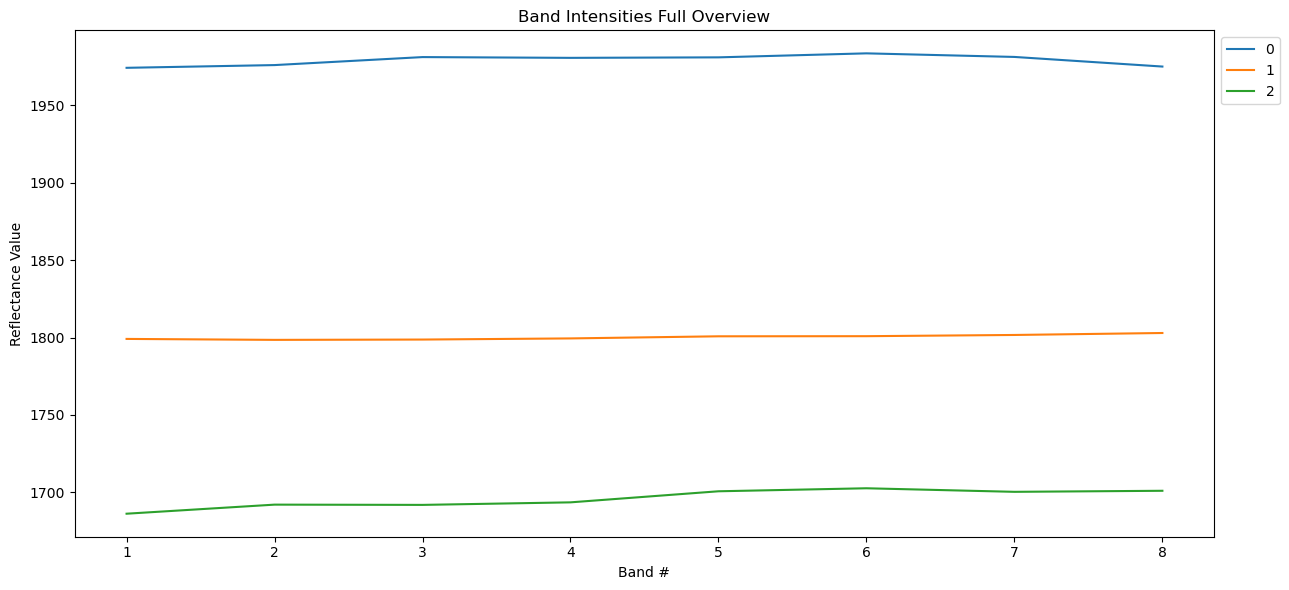

In [39]:
fig, ax = plt.subplots(figsize=[13, 6])

# Numbers 1-8 for bands
band_count = np.arange(1, 9)

# Convert y to numpy array for indexing
y_array = np.array(y)

# Iterate over unique classes
classes = np.unique(y_array)
for class_type in classes:
    # Calculate mean reflectance value for each band for the current class
    band_intensity = np.mean(X[y_array == class_type, :], axis=0)

    # Plot the mean reflectance values on the single plot
    ax.plot(band_count, band_intensity, label=class_type)

# Add axis labels
ax.set_xlabel('Band #')
ax.set_ylabel('Reflectance Value')

# Add a title
ax.set_title('Band Intensities Full Overview')

# Add legend outside of the plot
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Adjust layout to accommodate the legend
plt.tight_layout()

# Display the plot
plt.show()

In [40]:
def str_class_to_int(class_array):
    class_array[class_array == 0] = 0
    class_array[class_array == 1] = 1
    class_array[class_array == 2] = 2
    return(class_array.astype(int))

## GaussianNB Naive Bayes

In [67]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X, y)

GaussianNB()

In [68]:
from rasterio.plot import show
from rasterio.plot import show_hist
from rasterio.windows import Window
from rasterio.plot import reshape_as_raster, reshape_as_image

In [69]:
with rasterio.open(img_fp) as src:
    # may need to reduce this image size if your kernel crashes, takes a lot of memory
    img = src.read()[:, 400:950, 450:1500]

# Take our full image and reshape into long 2d array (nrow * ncol, nband) for classification
print(img.shape)
reshaped_img = reshape_as_image(img)
print(reshaped_img.shape)

(8, 550, 1050)
(550, 1050, 8)


In [70]:
class_prediction = gnb.predict(reshaped_img.reshape(-1, 8))

# Reshape our classification map back into a 2D matrix so we can visualize it
class_prediction = class_prediction.reshape(reshaped_img[:, :, 0].shape)

In [71]:
class_prediction = str_class_to_int(class_prediction)

In [72]:
def color_stretch(image, index):
    colors = image[:, :, index].astype(np.float64)
    for b in range(colors.shape[2]):
        colors[:, :, b] = rasterio.plot.adjust_band(colors[:, :, b])
    return colors
    
# find the highest pixel value in the prediction image
n = int(np.max(class_prediction))

# next setup a colormap for our map
colors = dict((
    (0, (255, 215, 0, 255)),    # Buildings - Gold
    (1, (34, 139, 34, 255)),    # Green Areas - Forest Green
    (2, (255, 69, 0, 255)),     # Buildings - Orange Red
))

# Put 0 - 255 as float 0 - 1
for k in colors:
    v = colors[k]
    _v = [_v / 255.0 for _v in v]
    colors[k] = _v
    
index_colors = [colors[key] if key in colors else 
                (255, 255, 255, 0) for key in range(0, n+1)]

cmap = plt.matplotlib.colors.ListedColormap(index_colors, 'Classification', n+1)

C:\Users\leoni\AppData\Local\Temp\ipykernel_11952\1616326584.py:21: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


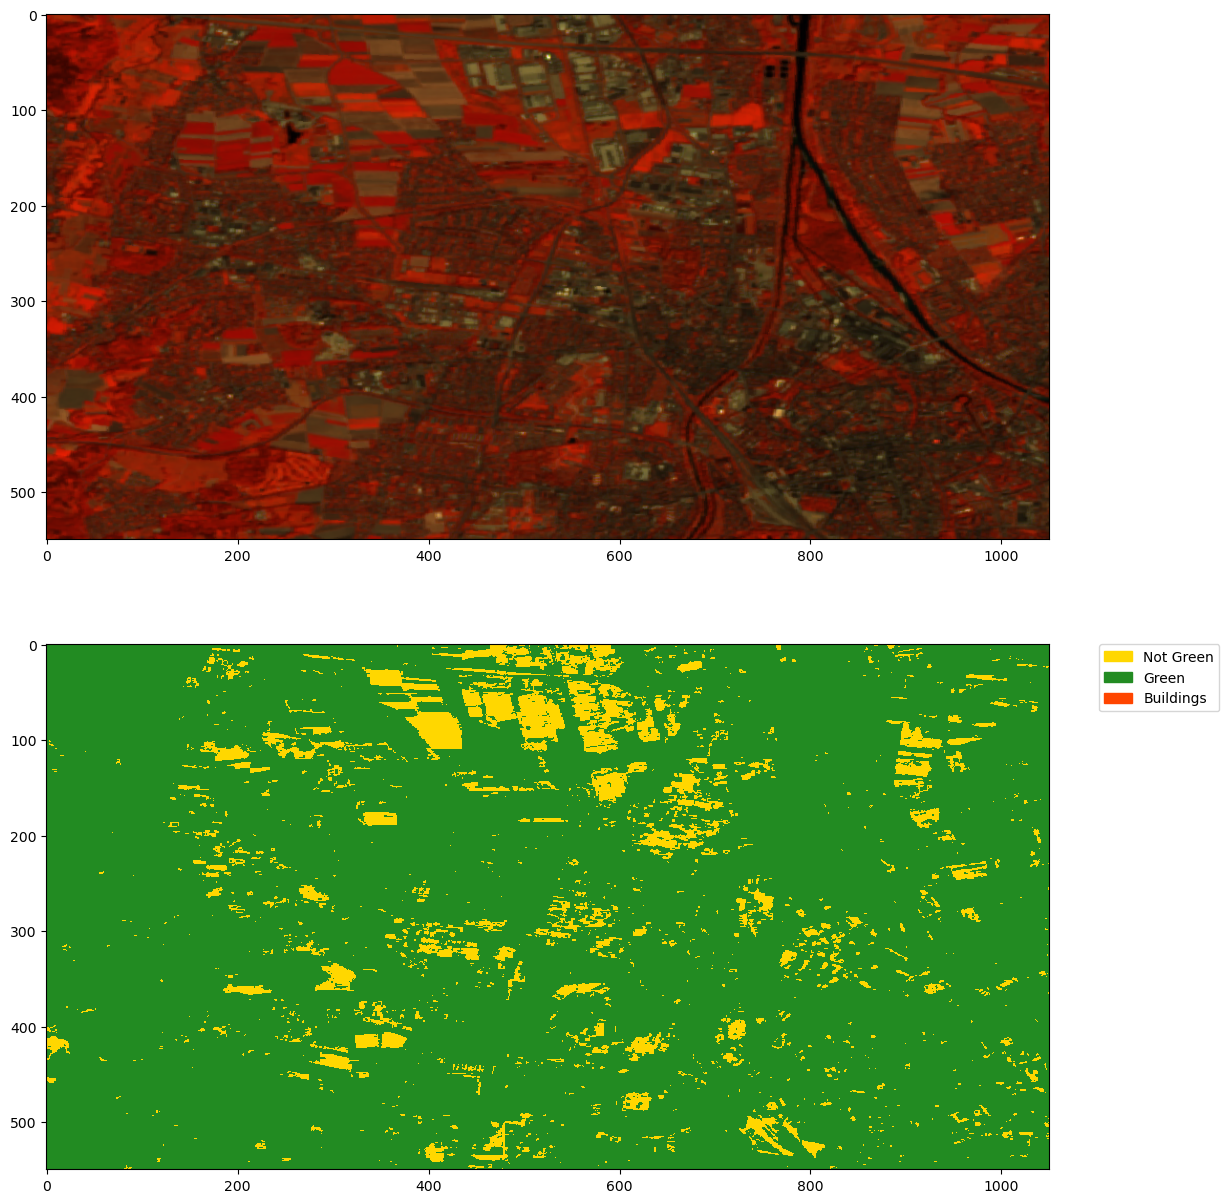

In [73]:
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap

# Define the class labels and their corresponding colors
class_labels = {
    0: "Not Green",
    1: "Green",
    2: "Buildings",
}

patches = [mpatches.Patch(color=colors[key], label=class_labels[key]) for key in class_labels]

fig, axs = plt.subplots(2,1,figsize=(20,15))

img_stretched = color_stretch(reshaped_img, [7, 3, 2])
axs[0].imshow(img_stretched)

axs[1].imshow(class_prediction, cmap=cmap, interpolation='none')
axs[1].legend(handles=patches, loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

fig.show()

In [74]:
with rasterio.open(img_fp) as src:
    green_band = src.read(3)
    red_band = src.read(4)
    nir_band = src.read(8)
    
ndwi = (green_band.astype(float) - nir_band.astype(float)) / (green_band.astype(float) + nir_band.astype(float))
ndvi = (nir_band.astype(float) - red_band.astype(float)) / (red_band.astype(float) + nir_band.astype(float))

In [75]:
ndwi = ndwi[150:600, 250:1400]
ndvi = ndvi[150:600, 250:1400]

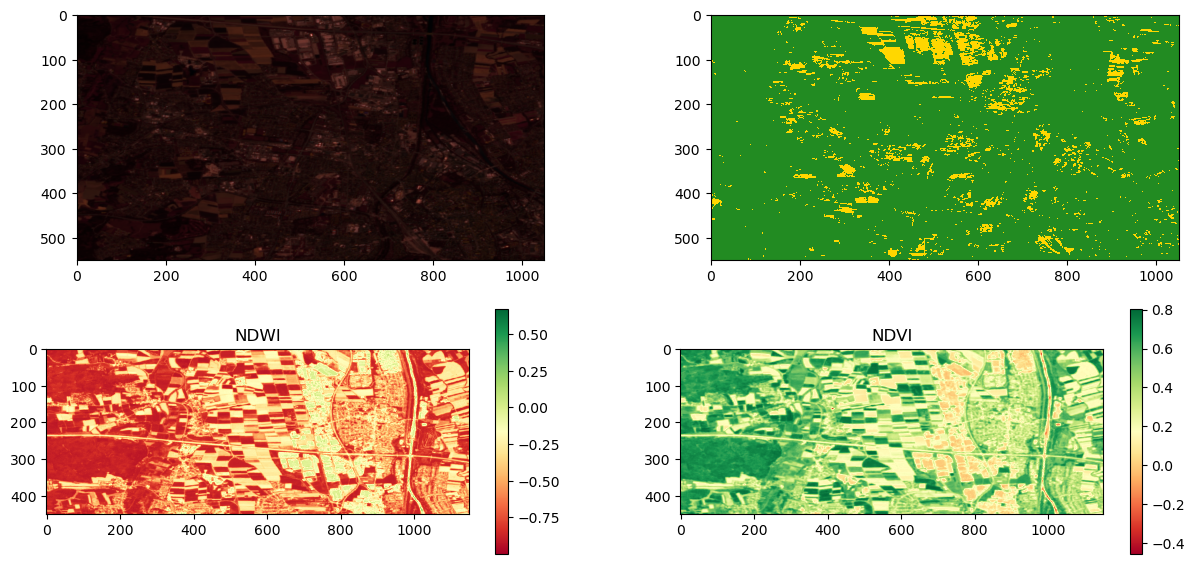

In [76]:
fig, axs = plt.subplots(2,2,figsize=(15,7))

img_stretched = color_stretch(reshaped_img, [3, 2, 1])
axs[0,0].imshow(img_stretched)

axs[0,1].imshow(class_prediction, cmap=cmap, interpolation='none')

nwdi_plot = axs[1,0].imshow(ndwi, cmap="RdYlGn")
axs[1,0].set_title("NDWI")
fig.colorbar(nwdi_plot, ax=axs[1,0])

ndvi_plot = axs[1,1].imshow(ndvi, cmap="RdYlGn")
axs[1,1].set_title("NDVI")
fig.colorbar(ndvi_plot, ax=axs[1,1])

plt.show()

C:\Users\leoni\AppData\Local\Temp\ipykernel_11952\1670099218.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


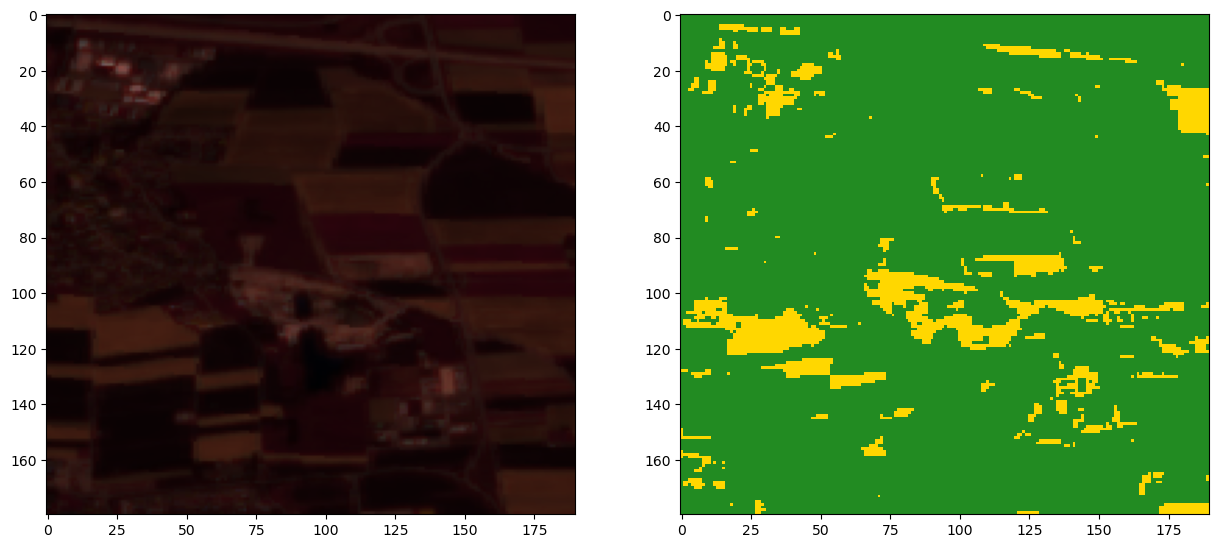

In [77]:
fig, axs = plt.subplots(1,2,figsize=(15,15))

img_stretched = color_stretch(reshaped_img, [3, 2, 1])
axs[0].imshow(img_stretched[0:180, 160:350])

axs[1].imshow(class_prediction[0:180, 160:350], cmap=cmap, interpolation='none')

fig.show()

## Random Forest

In [63]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import rasterio
import matplotlib.pyplot as plt

# Create the Random Forest model
rf = RandomForestClassifier()

# Train the model
rf.fit(X, y)

RandomForestClassifier()

In [64]:
with rasterio.open(img_fp) as src:
    img = src.read()[:, 400:950, 450:1500]
reshaped_img = reshape_as_image(img)

# Predict the classes using the Random Forest model
class_prediction = rf.predict(reshaped_img.reshape(-1, 8))

# Reshape the classification map for visualization
class_prediction = str_class_to_int(class_prediction) 

In [65]:
def color_stretch(image, index):
    colors = image[:, :, index].astype(np.float64)
    for b in range(colors.shape[2]):
        colors[:, :, b] = rasterio.plot.adjust_band(colors[:, :, b])
    return colors
    
# find the highest pixel value in the prediction image
n = int(np.max(class_prediction))

# next setup a colormap for our map
colors = dict((
    (0, (255, 215, 0, 255)),    # Buildings - Gold
    (1, (34, 139, 34, 255)),    # Green Areas - Forest Green
    (2, (255, 69, 0, 255)),     # Buildings - Orange Red
))

# Put 0 - 255 as float 0 - 1
for k in colors:
    v = colors[k]
    _v = [_v / 255.0 for _v in v]
    colors[k] = _v
    
index_colors = [colors[key] if key in colors else 
                (255, 255, 255, 0) for key in range(0, n+1)]

cmap = plt.matplotlib.colors.ListedColormap(index_colors, 'Classification', n+1)

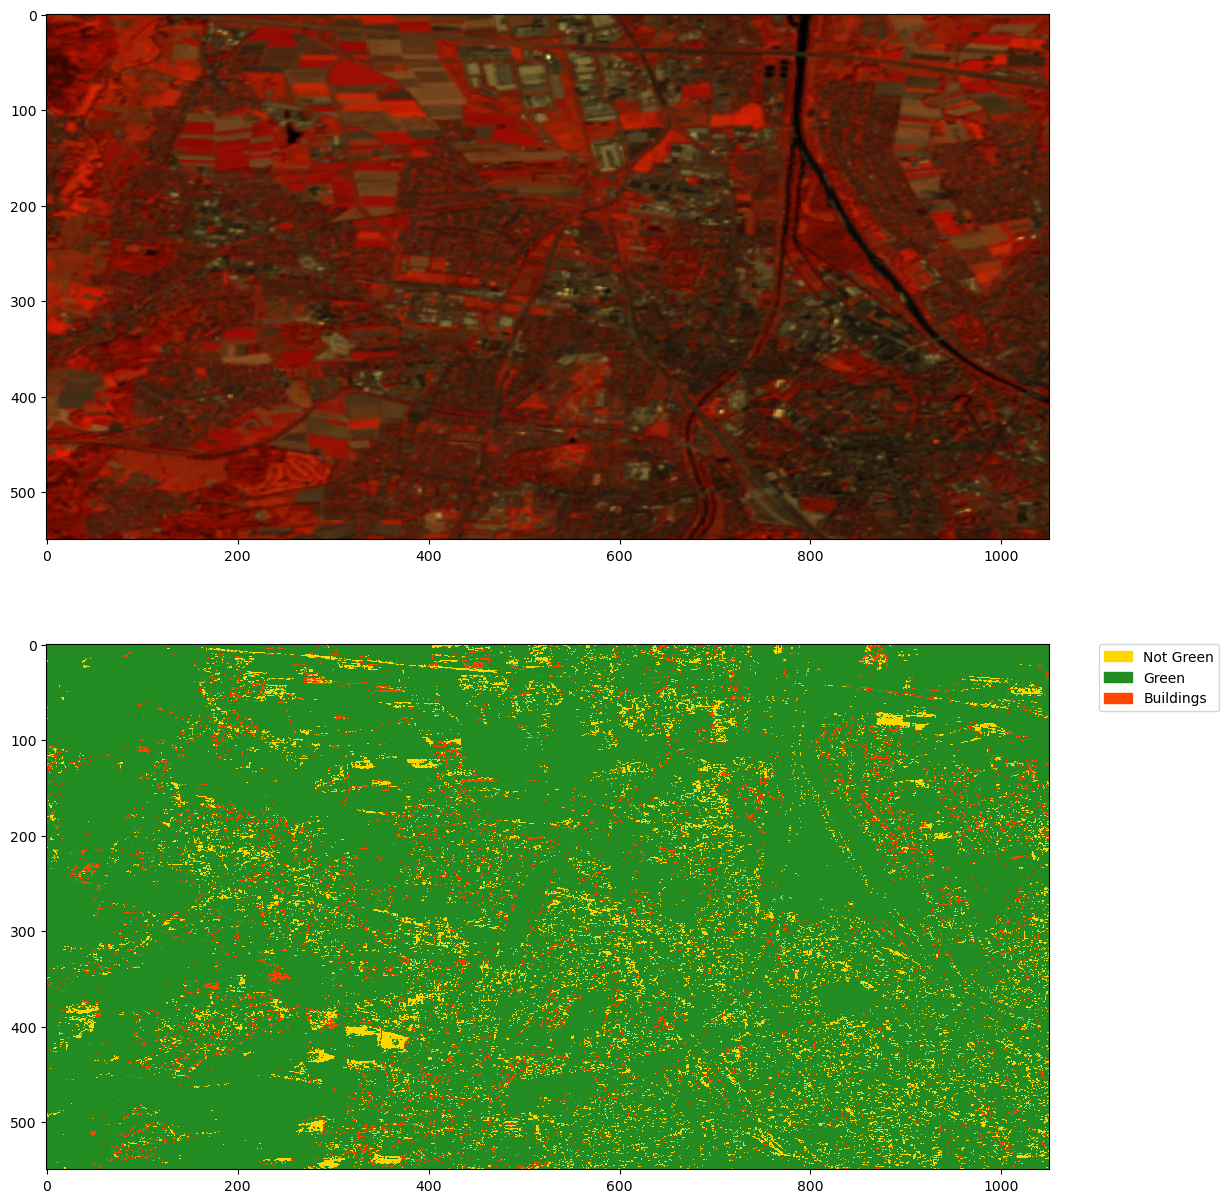

In [66]:
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap

# Assuming reshaped_img is in the correct format
expected_shape = reshaped_img[:, :, 0].shape
class_prediction_2d = class_prediction.reshape(expected_shape)

fig, axs = plt.subplots(2, 1, figsize=(20, 15))

img_stretched = color_stretch(reshaped_img, [7, 3, 2])
axs[0].imshow(img_stretched)

# Use the reshaped 2D array for visualization
axs[1].imshow(class_prediction_2d, cmap=cmap, interpolation='none')
axs[1].legend(handles=patches, loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

plt.show()

## KMeans

c:\Users\leoni\Programme\Miniconda\envs\geo\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\leoni\Programme\Miniconda\envs\geo\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\leoni\Programme\Miniconda\envs\geo\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


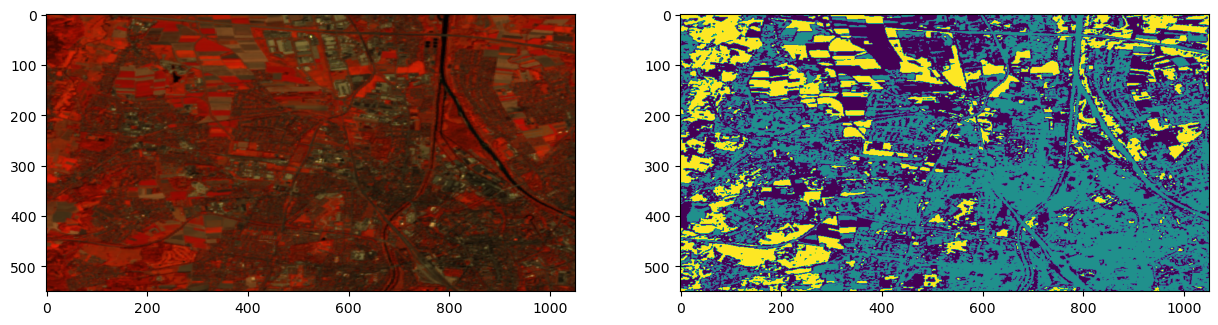

In [55]:
from sklearn.cluster import KMeans

bands, rows, cols = img.shape

k = 3 # num of clusters

kmeans_predictions = KMeans(n_clusters=k, random_state=0).fit(reshaped_img.reshape(-1, 8))

kmeans_predictions_2d = kmeans_predictions.labels_.reshape(rows, cols)

# Now show the classmap next to the image
fig, axs = plt.subplots(1,2,figsize=(15,8))

img_stretched = color_stretch(reshaped_img, [7, 3, 2]) #try different band combinations
axs[0].imshow(img_stretched)

axs[1].imshow(kmeans_predictions_2d)

## KNeighbours

In [56]:
from sklearn.neighbors import KNeighborsClassifier

# Create the KNN model
knn = KNeighborsClassifier()

# Train the model
knn.fit(X, y)

KNeighborsClassifier()

In [57]:
with rasterio.open(img_fp) as src:
    img = src.read()[:, 400:950, 450:1500]
reshaped_img = reshape_as_image(img)

# Predict the classes using the KNN model
class_prediction = knn.predict(reshaped_img.reshape(-1, 8))

# Reshape the classification map for visualization
class_prediction = str_class_to_int(class_prediction)

In [58]:
def color_stretch(image, index):
    colors = image[:, :, index].astype(np.float64)
    for b in range(colors.shape[2]):
        colors[:, :, b] = rasterio.plot.adjust_band(colors[:, :, b])
    return colors
    
# find the highest pixel value in the prediction image
n = int(np.max(class_prediction))

# next setup a colormap for our map
colors = dict((
    (0, (255, 215, 0, 255)),    # Buildings - Gold
    (1, (34, 139, 34, 255)),    # Green Areas - Forest Green
    (2, (255, 69, 0, 255)),     # Buildings - Orange Red
))

# Put 0 - 255 as float 0 - 1
for k in colors:
    v = colors[k]
    _v = [_v / 255.0 for _v in v]
    colors[k] = _v
    
index_colors = [colors[key] if key in colors else 
                (255, 255, 255, 0) for key in range(0, n+1)]

cmap = plt.matplotlib.colors.ListedColormap(index_colors, 'Classification', n+1)

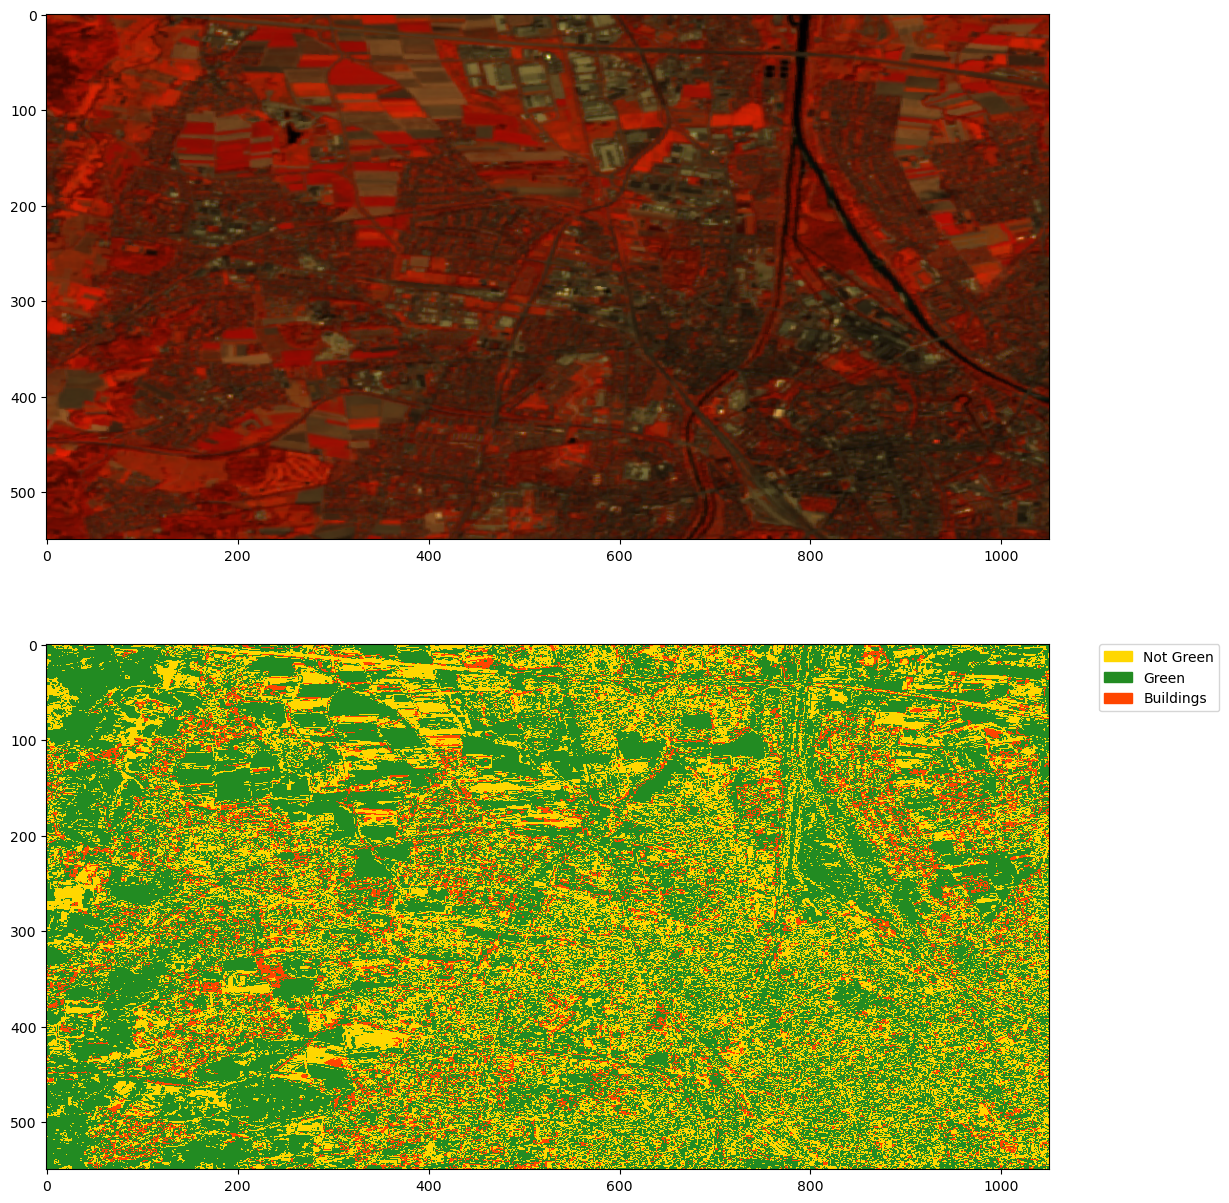

In [59]:
fig, axs = plt.subplots(2, 1, figsize=(20, 15))

img_stretched = color_stretch(reshaped_img, [7, 3, 2])
axs[0].imshow(img_stretched)

class_prediction_2d = class_prediction.reshape(reshaped_img[:, :, 0].shape)
axs[1].imshow(class_prediction_2d, cmap=cmap, interpolation='none')
axs[1].legend(handles=patches, loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

plt.show()

## Decision Tree

In [60]:
from sklearn.tree import DecisionTreeClassifier

# Create the Decision Tree model
dt = DecisionTreeClassifier()

# Train the model
dt.fit(X, y)

DecisionTreeClassifier()

In [61]:
# Read and reshape the image
with rasterio.open(img_fp) as src:
    img = src.read()[:, 400:950, 450:1500]
reshaped_img = reshape_as_image(img)

# Predict the classes using the Decision Tree model
class_prediction = dt.predict(reshaped_img.reshape(-1, 8))

# Reshape the classification map for visualization
class_prediction = str_class_to_int(class_prediction)

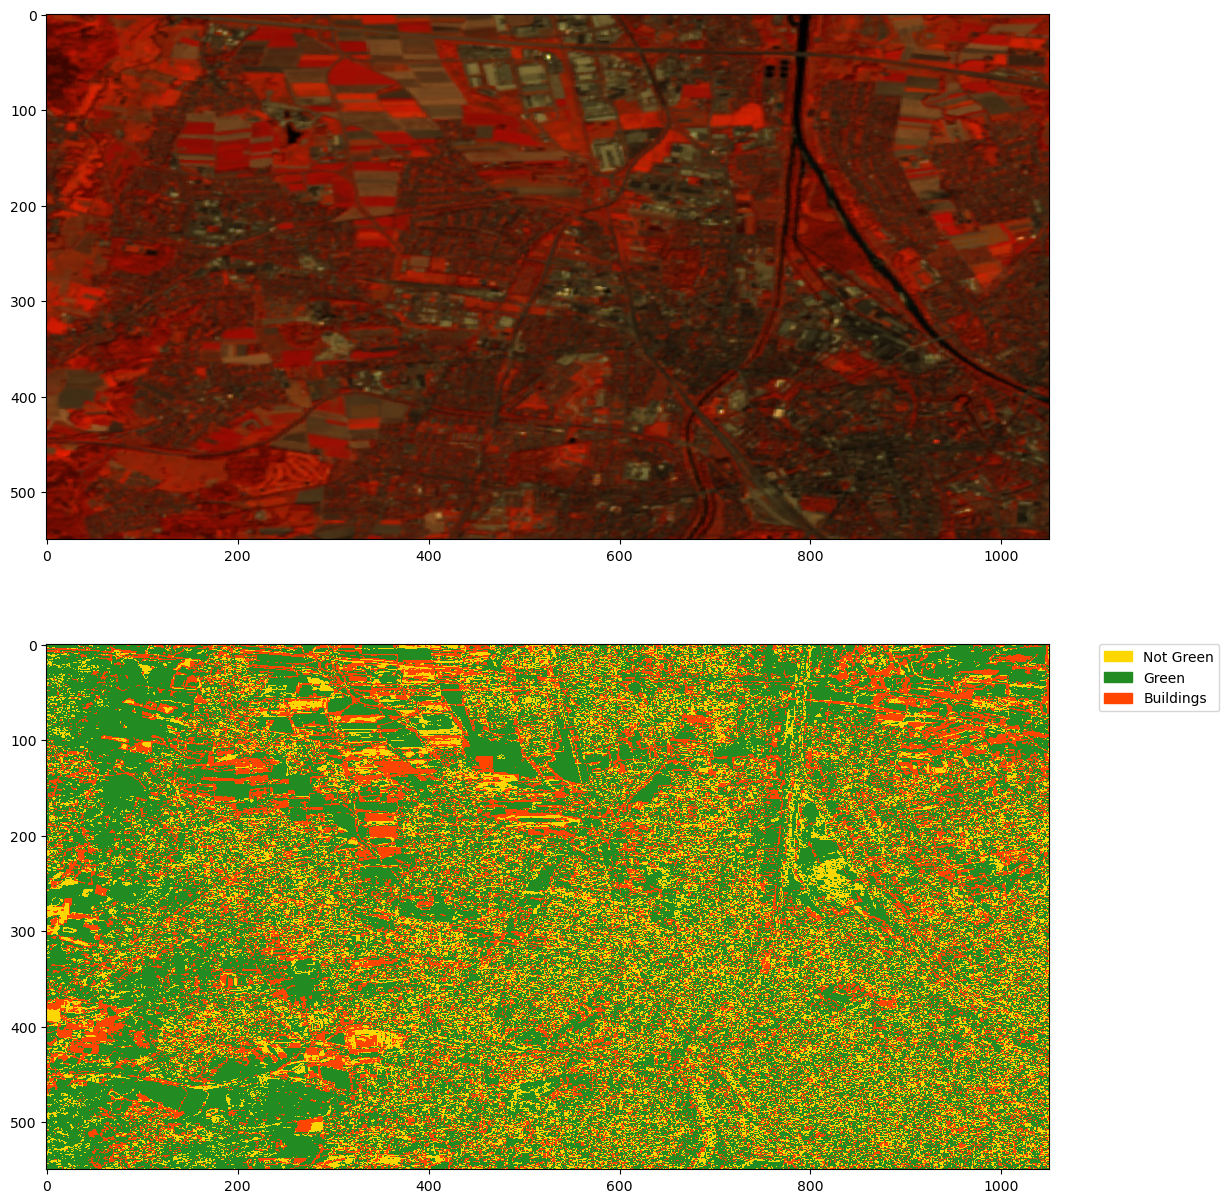

In [62]:
fig, axs = plt.subplots(2, 1, figsize=(20, 15))

img_stretched = color_stretch(reshaped_img, [7, 3, 2])
axs[0].imshow(img_stretched)

class_prediction_2d = class_prediction.reshape(reshaped_img[:, :, 0].shape)
axs[1].imshow(class_prediction_2d, cmap=cmap, interpolation='none')
axs[1].legend(handles=patches, loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

plt.show()